In [1]:
import time
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def read_mesh(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    n, m = map(int, lines[0].split())
    vertices = [tuple(map(float, line.split())) for line in lines[1:n+1]]
    triangles = [list(map(int, line.split())) for line in lines[n+1:]]

    return n, m, vertices, triangles

def transform_to_dual(n, m, vertices, triangles):
    dual_graph = []
    for i in range(n):
        vertex_info = vertices[i] + (-1,)
        for j in range(m):
            if i in triangles[j]:
                adjacent_triangles = [t for t in triangles[j] if t != i]
                vertex_info += tuple(adjacent_triangles)
        dual_graph.append(vertex_info)

    return dual_graph

def save_dual_graph(filename, n, m, dual_graph):
    with open(filename, 'w') as file:
        file.write(f"{n} {m}\n")
        for vertex_info in dual_graph:
            file.write(" ".join(map(str, vertex_info)) + "\n")


def save_dual_mesh_with_adjacencies(filename, n, m, vertices, triangles, dual_graph):
    with open(filename, 'w') as file:
        file.write(f"{n} {m}\n")

        for vertex in vertices:
            file.write(f"{vertex[0]} {vertex[1]}\n")

        for i, vertex_info in enumerate(dual_graph):
            file.write(" ".join(map(str, vertex_info)) + " ")
            adjacent_triangles = vertex_info[2:]
            file.write(" ".join(map(str, adjacent_triangles)) + "\n")

if __name__ == "__main__":
    input_filename = "malha.txt"
    output_filename = "dual_graph.txt"
    output_filename_with_adjacencies = "malha_adj.txt"
    
    n, m, vertices, triangles = read_mesh(input_filename)
    dual_graph = transform_to_dual(n, m, vertices, triangles)
    save_dual_graph(output_filename, n, m, dual_graph)
    save_dual_mesh_with_adjacencies(output_filename_with_adjacencies, n, m, vertices, triangles, dual_graph)


In [3]:
for i, vertex_info in enumerate(dual_graph):
    x, y, *adjacent_triangles = vertex_info

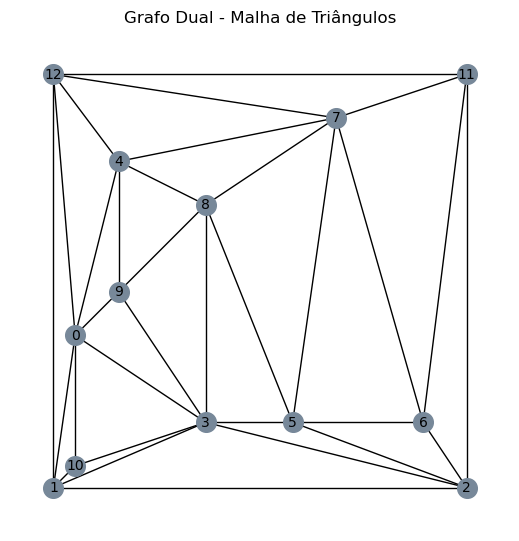

In [4]:
G = nx.Graph()

for i, vertex_info in enumerate(dual_graph):
    x, y, *adjacent_triangles = vertex_info
    G.add_node(i, pos=(x, y))

for i, vertex_info in enumerate(dual_graph):
    x, y, *adjacent_triangles = vertex_info
    for adjacent_triangle in adjacent_triangles:
        if adjacent_triangle != -1:
            G.add_edge(i, adjacent_triangle)

pos = nx.get_node_attributes(G, 'pos')

plt.figure(figsize=(5, 5))
nx.draw(G, pos, with_labels=True, node_size=200, font_size=10, font_color='black', node_color='lightslategray', edge_color='black')
plt.title("Grafo Dual - Malha de Triângulos")
plt.axis('off')
plt.savefig('grafo_dual.pdf')
plt.show()

100


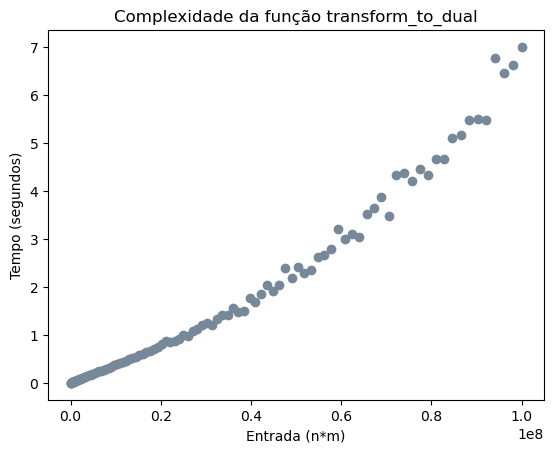

In [5]:
import time
import matplotlib.pyplot as plt

input_sizes = []
times = []
num_iter = 0
for n in range(100, 10100, 100):  
    m = n
    vertices = [(i, i) for i in range(n)]
    triangles = [[i, i+1, i+2] for i in range(m)]
    
    start_time = time.time()
    transform_to_dual(n, m, vertices, triangles)
    end_time = time.time()
    
    input_sizes.append(n*m)
    times.append(end_time - start_time)
    num_iter += 1

print(num_iter)
# Plot the input sizes against the times
plt.scatter(input_sizes, times, color='lightslategray')
plt.xlabel('Entrada (n*m)')
plt.ylabel('Tempo (segundos)')
plt.title('Complexidade da função transform_to_dual')
plt.savefig('complexidade.pdf')
plt.show()